# Introduction to geospatial machine learning
In this notebook we are going to cover aspects of geospatial visualization and introduce you on how to create your own geospatial data using GeoPandas

### Geospatial visualization
We are still going to use the New York Boroughs in-built dataset provided by geopandas.

In [6]:
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf = gdf.set_index("BoroName")
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry
BoroName,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


Let's say we want to visualize the relative area of each Borough in NYC. We can call the plot function and pass it the area :

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

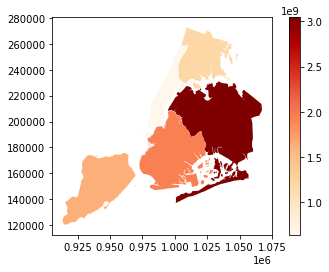

In [11]:
gdf["area"] = gdf.area
gdf.plot("area", legend=True, cmap="OrRd")

With this choice of color we can clearly see which area is the most important. If we look in to the dataset this dark red area corresponds to :

In [18]:
print(gdf["BoroCode"].where(gdf["area"] == gdf["area"].max()))

BoroName
Staten Island    NaN
Queens           4.0
Brooklyn         NaN
Manhattan        NaN
Bronx            NaN
Name: BoroCode, dtype: float64


So it appears to be Queens !

#### Plotting the data
We can plot 2 and more layers by first creating an axis to which we are going to draw the 2 and more layers, and telling the each of the plot() function to draw on this newly created axis.

In [19]:
gdf["centroid"] = gdf.centroid

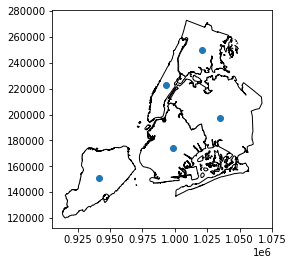

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdf.plot(ax=ax, color='white', edgecolor='black')
gdf['centroid'].plot(ax=ax)
plt.show()

### Introduction to Geometry
The next question then arises: can we create new geometry from the existing geometries that we have? Yes, and this post will demonstrate two of such examples.

#### A. Buffer
Lets say you want to setup a no-drone-fly zone around New York because there are VIPs coming into the state, we can draw buffer of say 10,000 feet around the areas.

<AxesSubplot:>

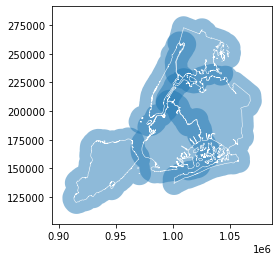

In [21]:
# Get the boundary of each area
gdf["boundary"] = gdf.boundary

# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10000)
ax = gdf["buffered"].plot(alpha=.5)
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)

#### B. Envelope
If you then want to find the smallest rectangle encapsulating an area, you can also call envelope function and plot the resulting geometry similar to Buffer above.

<AxesSubplot:>

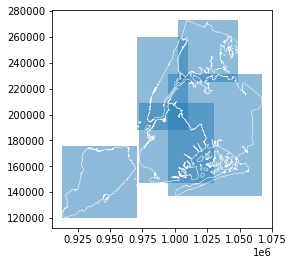

In [22]:
#Get the envelope of each area
gdf["enveloped"] = gdf.envelope

# plotting the smallest rectangle envelope around an area
ax = gdf["enveloped"].plot(alpha=.5)
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)

So we can extract new geometric forms out of our base geometries !
It's very useful for results presentation and data comparison.